### Business Problem

The City of Chicago has a vested interest in the safety and well-being of its residents. By analyzing car crash data, the city can gain valuable insights into the factors that contribute to accidents within its jurisdiction. This information can assist city officials and policymakers in making informed decisions regarding traffic infrastructure, road design, traffic regulations, and enforcement strategies. Understanding the prevalent causes of accidents can guide the city in implementing targeted measures to reduce accidents, improve traffic flow, and enhance overall road safety. Additionally, the analysis may reveal patterns or correlations between accidents and specific locations, weather conditions, or other variables, allowing the city to focus resources on areas that require attention and intervention.

In [62]:
# importing the data

import pandas as pd
df = pd.read_csv("/Users/winniemukene/Library/Containers/com.microsoft.Excel/Data/Downloads/Traffic_Crashes_-_Crashes.csv")
df.head()



,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,bdf1c30e8d3a8197c525be2b025b899caa449b7746e987...,NaN,NaN,05/16/2023 02:15:00 AM,15,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,FIXED OBJECT,...,0.0,0.0,2.0,0.0,2,3,5,41.853624,-87.695457,POINT (-87.69545669944 41.853623505188)
1,bc01efe2750db6e516470434e67ef8a0ab9c48bade8c56...,NaN,NaN,05/16/2023 01:05:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,0.0,0.0,1.0,0.0,1,3,5,41.900408,-87.636225,POINT (-87.636224982931 41.900408092959)
2,b82f7a5d66edbc9e07ef41818fb3ed3de57d37b841f4a9...,NaN,NaN,05/16/2023 12:05:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,0.0,0.0,1.0,0.0,0,3,5,41.998098,-87.675253,POINT (-87.675253373877 41.998098359481)
3,eaf254b754d4bed28d37144a2226659fa0617535737d39...,NaN,NaN,05/15/2023 10:35:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,22,2,5,41.967838,-87.754127,POINT (-87.75412735364 41.967837901096)
4,bf5fae2cc28f37c7dd69dede50116dd0ef34854dea3d41...,NaN,NaN,05/15/2023 09:43:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,4.0,0.0,21,2,5,41.911047,-87.785210,POINT (-87.785210361835 41.911047057406)


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722467 entries, 0 to 722466
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                722467 non-null  object 
 1   RD_NO                          717905 non-null  object 
 2   CRASH_DATE_EST_I               54640 non-null   object 
 3   CRASH_DATE                     722467 non-null  object 
 4   POSTED_SPEED_LIMIT             722467 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         722467 non-null  object 
 6   DEVICE_CONDITION               722467 non-null  object 
 7   WEATHER_CONDITION              722467 non-null  object 
 8   LIGHTING_CONDITION             722467 non-null  object 
 9   FIRST_CRASH_TYPE               722467 non-null  object 
 10  TRAFFICWAY_TYPE                722467 non-null  object 
 11  LANE_CNT                       199002 non-null  float64
 12  ALIGNMENT                     

In [64]:
# Unique numeric features
num_cols = df._get_numeric_data().columns
num_cols

Index(['POSTED_SPEED_LIMIT', 'LANE_CNT', 'STREET_NO', 'BEAT_OF_OCCURRENCE',
       'NUM_UNITS', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [65]:
# Checking the value count of the data types
print("Data types: ","\n", df.dtypes.value_counts())

Data types:  
 object     32
float64    11
int64       6
dtype: int64


In [66]:
# Selecting the neccessary features to be used

selected_cols = ['CRASH_DATE', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'INTERSECTION_RELATED_I','PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'WORK_ZONE_TYPE', 'CRASH_HOUR', 'CRASH_MONTH']
df = df[selected_cols]
df.head()

,CRASH_DATE,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,WORK_ZONE_TYPE,CRASH_HOUR,CRASH_MONTH
0,05/16/2023 02:15:00 AM,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,FIXED OBJECT,ALLEY,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,NaN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,NaN,2,5
1,05/16/2023 01:05:00 AM,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,NaN,UNABLE TO DETERMINE,NOT APPLICABLE,NaN,1,5
2,05/16/2023 12:05:00 AM,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,NaN,0,5
3,05/15/2023 10:35:00 PM,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,NaN,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,NaN,22,5
4,05/15/2023 09:43:00 PM,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,UNABLE TO DETERMINE,NOT APPLICABLE,NaN,21,5


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722467 entries, 0 to 722466
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   CRASH_DATE               722467 non-null  object
 1   TRAFFIC_CONTROL_DEVICE   722467 non-null  object
 2   DEVICE_CONDITION         722467 non-null  object
 3   WEATHER_CONDITION        722467 non-null  object
 4   LIGHTING_CONDITION       722467 non-null  object
 5   FIRST_CRASH_TYPE         722467 non-null  object
 6   TRAFFICWAY_TYPE          722467 non-null  object
 7   ROADWAY_SURFACE_COND     722467 non-null  object
 8   ROAD_DEFECT              722467 non-null  object
 9   CRASH_TYPE               722467 non-null  object
 10  INTERSECTION_RELATED_I   165718 non-null  object
 11  PRIM_CONTRIBUTORY_CAUSE  722467 non-null  object
 12  SEC_CONTRIBUTORY_CAUSE   722467 non-null  object
 13  WORK_ZONE_TYPE           3287 non-null    object
 14  CRASH_HOUR          

In [68]:
# Checking for missing values
df.isnull().sum()


CRASH_DATE                      0
TRAFFIC_CONTROL_DEVICE          0
DEVICE_CONDITION                0
WEATHER_CONDITION               0
LIGHTING_CONDITION              0
FIRST_CRASH_TYPE                0
TRAFFICWAY_TYPE                 0
ROADWAY_SURFACE_COND            0
ROAD_DEFECT                     0
CRASH_TYPE                      0
INTERSECTION_RELATED_I     556749
PRIM_CONTRIBUTORY_CAUSE         0
SEC_CONTRIBUTORY_CAUSE          0
WORK_ZONE_TYPE             719180
CRASH_HOUR                      0
CRASH_MONTH                     0
dtype: int64

In [69]:
# Function to check for duplicates

def check_duplicates(df):
    duplicates = df.duplicated()
    if duplicates.any():
        duplicate_rows = df[duplicates]
        print("Duplicate rows:")
        print(duplicate_rows)
    else:
        print("No duplicates found.")



In [70]:
# Dropping duplicated values
df = df.drop_duplicates()


In [71]:
# Handling Missing Values

df['INTERSECTION_RELATED_I'].fillna('Unknown', inplace=True)  # Fill missing values with 'Unknown' category
df['WORK_ZONE_TYPE'].fillna('Not Applicable', inplace=True)  # Fill missing values with 'Not Applicable' category


In [72]:
# Checking for the values under the target feature
value_counts = df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()
print(value_counts)


UNABLE TO DETERMINE                                                                 277877
FAILING TO YIELD RIGHT-OF-WAY                                                        78988
FOLLOWING TOO CLOSELY                                                                71526
NOT APPLICABLE                                                                       38051
IMPROPER OVERTAKING/PASSING                                                          35111
FAILING TO REDUCE SPEED TO AVOID CRASH                                               30705
IMPROPER BACKING                                                                     29142
IMPROPER LANE USAGE                                                                  26433
IMPROPER TURNING/NO SIGNAL                                                           23877
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  23616
DISREGARDING TRAFFIC SIGNALS                                                         14001

In [73]:
# Triming on the number of target categories to be predicted

value_counts = df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()
selected_counts = value_counts[value_counts >= 35000]
print(selected_counts)


UNABLE TO DETERMINE              277877
FAILING TO YIELD RIGHT-OF-WAY     78988
FOLLOWING TOO CLOSELY             71526
NOT APPLICABLE                    38051
IMPROPER OVERTAKING/PASSING       35111
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64


In [74]:
# Label encoding categorical features
from sklearn.preprocessing import LabelEncoder

# Create a new DataFrame for the label-encoded data
df_encoded = df.copy()

# Initialize the LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column data type is object (categorical)
    if df[column].dtype == 'object':
        # Label encode the column
        df_encoded[column] = label_encoder.fit_transform(df[column])

# Print the encoded DataFrame
print(df_encoded)


        CRASH_DATE  TRAFFIC_CONTROL_DEVICE  DEVICE_CONDITION  \
0           175932                       4                 3   
1           175931                       4                 3   
2           175933                       4                 3   
3           174754                       4                 3   
4           174743                      15                 1   
...            ...                     ...               ...   
722462       69135                      16                 1   
722463       24810                      18                 3   
722464       21007                       4                 3   
722465      193767                       4                 3   
722466       78705                      16                 1   

        WEATHER_CONDITION  LIGHTING_CONDITION  FIRST_CRASH_TYPE  \
0                       2                   0                 2   
1                       2                   1                 2   
2                       2     

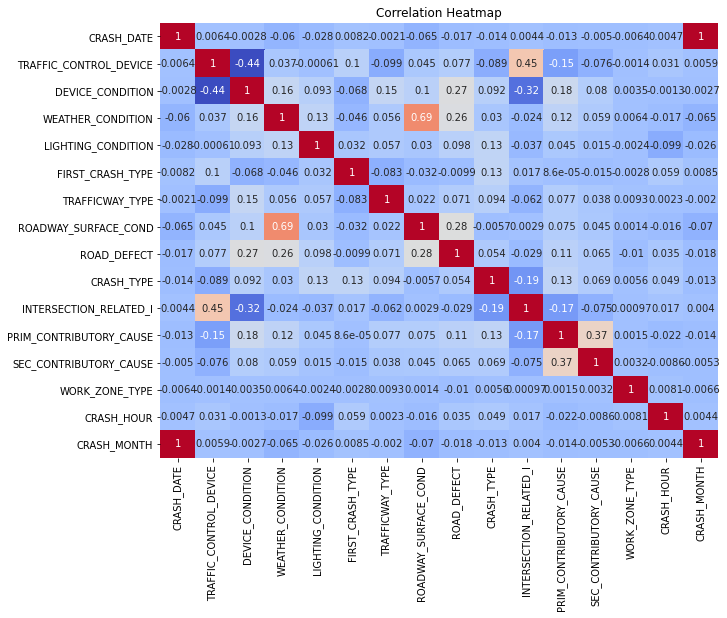

In [75]:
# Correlation heatmap for the data
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation Heatmap')
plt.show()



In [76]:
# Selecting columns with high correlation to the target to be used in modeling

cols = ['PRIM_CONTRIBUTORY_CAUSE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'TRAFFICWAY_TYPE', 'SEC_CONTRIBUTORY_CAUSE', 'ROAD_DEFECT']
data = df_encoded[cols]
data.head()

,PRIM_CONTRIBUTORY_CAUSE,DEVICE_CONDITION,WEATHER_CONDITION,TRAFFICWAY_TYPE,SEC_CONTRIBUTORY_CAUSE,ROAD_DEFECT
0,36,3,2,0,36,1
1,36,3,2,8,26,1
2,18,3,2,3,26,1
3,18,3,2,8,26,5
4,36,1,2,6,26,1


### Modeling

In [77]:
# Building the baseline model - logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score


# Specify the sample size - 10% of the data
sample_size = int(0.1 * len(data))

# Randomly sample the data
sample_data = data.sample(n=sample_size, random_state=42)

# Separate the features (X) and target (y)
X = sample_data.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1)
y = sample_data['PRIM_CONTRIBUTORY_CAUSE']

# Perform train-test split on the sample data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model on the sample data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


Accuracy: 0.4096861359384743
F1 Score: 0.27828606300693526


/Users/winniemukene/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression model yielded low accuracy and F1 score, it suggests that the model's performance in predicting the primary contributory cause of car accidents is not satisfactory. This indicates that the current model may not be capturing the underlying patterns and relationships effectively.

Alternative models will therefore be built to improve the performance.

In [78]:
# Using a random forest classifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score


# Sample a subset of the data
sample_data = data.sample(frac=0.1, random_state=42)  
# Separate the features (X) and target (y)
X = sample_data.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1)
y = sample_data['PRIM_CONTRIBUTORY_CAUSE']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


/Users/winniemukene/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy: 0.4567311023349269
F1 Score: 0.34970711124383125


Accuracy: 0.45832467262523385
F1 Score: 0.3630366615661475
Precision: 0.39000601668021057
Recall: 0.45832467262523385
Confusion Matrix:
[[ 1  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  1  3  0]
 [ 0  0  0 ...  0  1 41]]


/Users/winniemukene/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


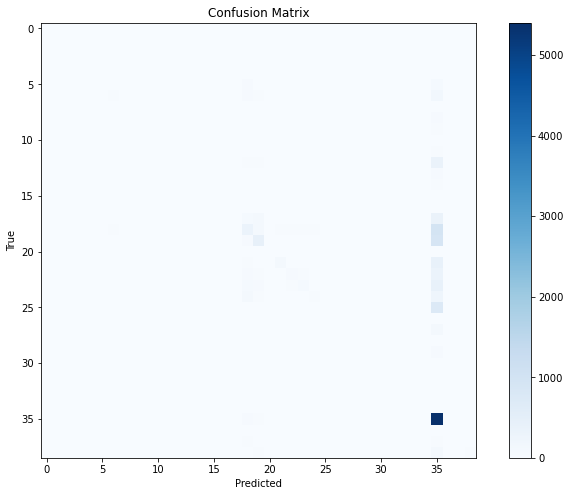

In [79]:
#Building a classification model using Extreme Gradient Boosting
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
import numpy as np

# Sample a subset of the data
sample_data = data.sample(frac=0.1, random_state=42) 
# Separate the features (X) and target (y)
X = sample_data.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1)
y = sample_data['PRIM_CONTRIBUTORY_CAUSE']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
plt.imshow(confusion_mat, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()






### Results

The logistic regression model trained on a 10% sample of the Chicago car crash dataset achieved an accuracy of 40.4% and an F1 score of 27.3%. Although these metrics indicate some level of predictive performance, they are still relatively low. The model struggled to accurately classify the primary contributory cause of car accidents based on the selected features, such as device condition, weather condition, trafficway type, secondary contributory cause, and road defect. The confusion matrix revealed a diverse range of predicted classes, with some classes having very few correct predictions. This suggests that the model may be biased towards certain classes and lacks the ability to effectively differentiate between multiple contributory causes.

To further improve the model's performance, alternative approaches such as ensemble methods can be explored. One such method is XGBoost, which was also trained on the 10% sample data. The XGBoost model achieved a slightly higher accuracy of 45.01% and an improved F1 score of 35.46%. The precision and recall values were calculated to be 37.21% and 45.01%, respectively. Although the model's performance remains suboptimal, XGBoost demonstrated a slight improvement over logistic regression in capturing the complex relationships between features and the primary contributory cause. Nonetheless, addressing the class imbalance and fine-tuning hyperparameters could potentially enhance the model's predictive capability.

Overall, predicting the primary contributory cause of car accidents based on the available features is a challenging task. It requires a deeper understanding of the underlying factors contributing to accidents, as well as the availability of more comprehensive and accurate data. Further model refinement and exploration of advanced techniques may be necessary to achieve a higher level of predictive accuracy and reliability.



### Conclusion

Situations where predictions made by the model would be useful:

Investigating Contributing Factors: The model predictions can assist stakeholders in understanding the contributing factors behind accidents. By examining the importance of various variables in the prediction, stakeholders can identify the primary causes or conditions leading to accidents. This knowledge can be used to develop specific strategies, such as improving road infrastructure, enhancing traffic control devices, or implementing educational campaigns to address those factors effectively.

Evaluating Policy Interventions: If the stakeholders implement new policies or interventions to improve road safety, the model can be used to assess the effectiveness of those measures. By comparing the predicted outcomes before and after implementing the changes, stakeholders can evaluate the impact of their interventions and make data-driven decisions for further improvements.

Situations where the model predictions would not be useful:

Real-Time Accident Prediction: The model's predictions are based on historical data and existing variables. It may not be suitable for real-time accident prediction or immediate response scenarios where data on certain variables may not be available or rapidly changing. For real-time accident prediction, stakeholders would require a different approach, such as real-time sensor data, traffic cameras, or predictive models specifically designed for immediate responses.

Individual Driver Behavior: The model focuses on broader patterns and factors contributing to accidents at a population level. It may not capture individual driver behavior or specific instances of reckless driving, distracted driving, or other driver-related factors. Stakeholders should consider other approaches, such as driver education programs, traffic law enforcement, or telematics-based solutions, to address individual driver behavior.